In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df=pd.read_csv(r'/content/Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [5]:
df.shape

(200, 5)

In [8]:
income_unique = df['Annual Income (k$)'].unique()

<Figure size 1200x800 with 0 Axes>

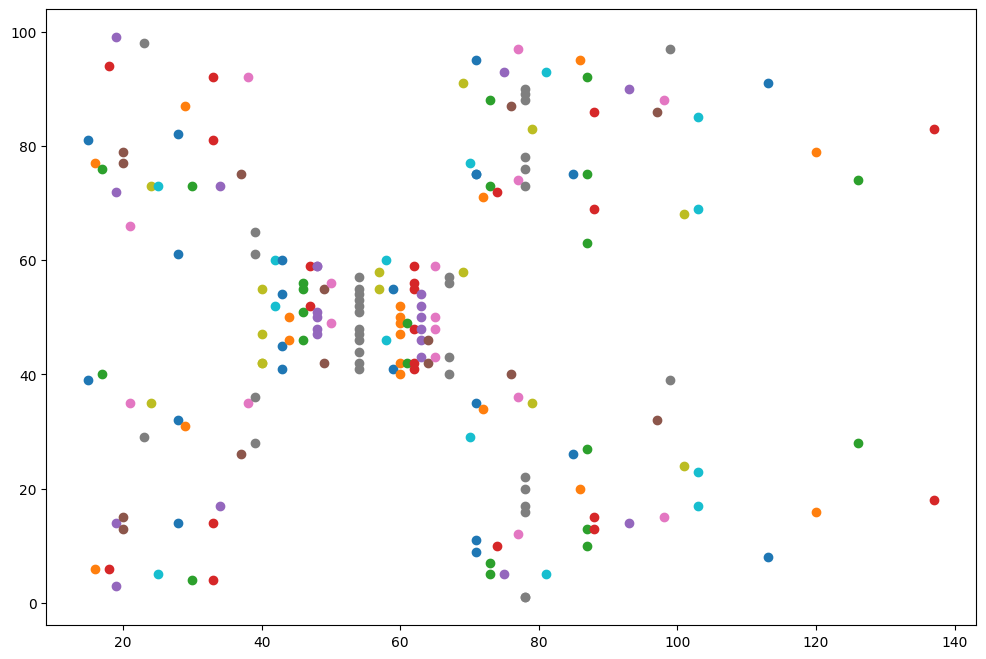

In [9]:
plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))
for income in income_unique:
    # Filter data for the current income value
    filtered_data = df[df['Annual Income (k$)'] == income]
    # Plot Spending Score vs. Annual Income
    plt.scatter([income] * len(filtered_data), filtered_data['Spending Score (1-100)'], label=f'Income: {income}k')



In [10]:
df['Annual Income (k$)'].max()

137

In [11]:
df['Annual Income (k$)'].min()

15

In [12]:
df['Annual Income (k$)'].mean()

60.56

In [13]:
df['Age'].mean()

38.85

In [14]:
df["Spending Score (1-100)"].max()

99

In [15]:
df["Spending Score (1-100)"].min()

1

In [16]:
df["Spending Score (1-100)"].mean()

50.2

In [19]:
avg_spending_score = df["Spending Score (1-100)"].mean()
spend_more_than_average = df[df["Spending Score (1-100)"] > avg_spending_score]
spend_more_than_average.shape

(97, 5)

In [20]:
spend_more_than_average=df[df["Spending Score (1-100)"]>55].sort_values(by="Spending Score (1-100)")

In [21]:
#spend more than income
spend_more_than_average[spend_more_than_average["Annual Income (k$)"]<=55].sort_values(by="Annual Income (k$)")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
11,12,Female,35,19,99
9,10,Female,30,19,72
15,16,Male,22,20,79
13,14,Female,24,20,77
17,18,Male,20,21,66
19,20,Female,35,23,98


In [22]:
gender_info=spend_more_than_average.groupby("Gender")

In [23]:
female_info=gender_info.get_group("Female").sort_values(by="Age")

In [24]:
female_info.shape

(43, 5)

In [25]:
female_info["Spending Score (1-100)"].max()

99

In [26]:
female_info["Spending Score (1-100)"].mean()

76.44186046511628

In [27]:
male_info=gender_info.get_group("Male").sort_values(by="Age")

In [28]:
male_info.shape

(35, 5)

In [29]:
male_info["Spending Score (1-100)"].max()

97

In [31]:
male_info["Spending Score (1-100)"].min()

56

In [32]:
male_info["Spending Score (1-100)"].mean()

75.77142857142857

In [33]:
X=df.iloc[:,[3,4]].values

In [34]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

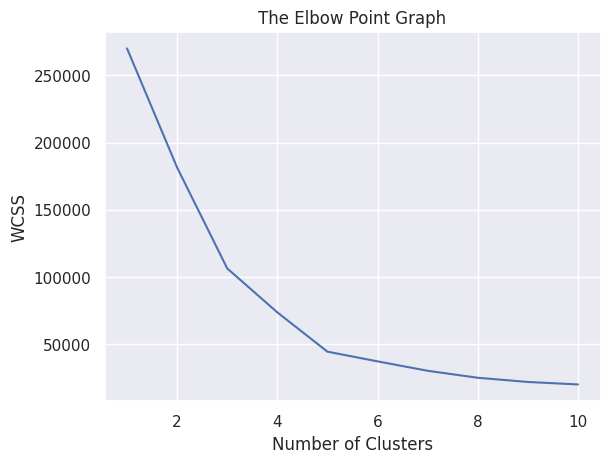

In [35]:
#adding more clusters decrease the WCSS
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y= kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
# Inspect the cluster centers
centroids = kmeans.cluster_centers_
print("Cluster Centers (Annual Income, Spending Score):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

# Define thresholds and assign labels based on actual centroids
cluster_names = {}
for i, centroid in enumerate(centroids):
    income = centroid[0]
    spending = centroid[1]

    # Assign income level
    if income < 60:
        income_label = "Low Income"
    elif 60 <= income <= 90:
        income_label = "Medium Income"
    else:
        income_label = "High Income"

    # Assign spending level
    if spending < 60:
        spending_label = "Low Spending"
    elif 60 <= spending <= 80:
        spending_label = "Medium Spending"
    else:
        spending_label = "High Spending"

    # Combine labels
    cluster_names[i] = f"{income_label}, {spending_label}"


Cluster Centers (Annual Income, Spending Score):
Cluster 0: [55.2962963  49.51851852]
Cluster 1: [86.53846154 82.12820513]
Cluster 2: [88.2        17.11428571]
Cluster 3: [26.30434783 20.91304348]
Cluster 4: [25.72727273 79.36363636]


In [38]:

# Add cluster labels to the DataFrame
df['Cluster'] = Y
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Print the DataFrame with cluster names
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster Name']].head())


   Annual Income (k$)  Spending Score (1-100)                 Cluster Name
0                  15                      39     Low Income, Low Spending
1                  15                      81  Low Income, Medium Spending
2                  16                       6     Low Income, Low Spending
3                  16                      77  Low Income, Medium Spending
4                  17                      40     Low Income, Low Spending


The new data point (Annual Income: 100k, Spending Score: 100) belongs to cluster: Medium Income, High Spending


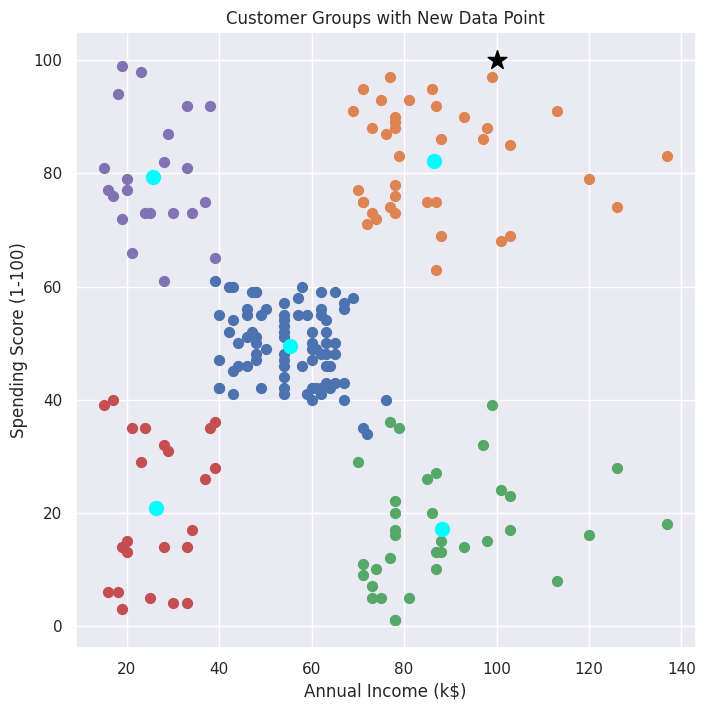

In [39]:

# New data point: [Annual Income, Spending Score]
new_data = np.array([[100, 100]])

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_data)
predicted_cluster_name = cluster_names[predicted_cluster[0]]

print(f'The new data point (Annual Income: {new_data[0, 0]}k, Spending Score: {new_data[0, 1]}) belongs to cluster: {predicted_cluster_name}')

# Visualize the clusters along with the new data point
plt.figure(figsize=(8, 8))
for i in range(kmeans.n_clusters):
    plt.scatter(X[Y == i, 0], X[Y == i, 1], s=50, label=cluster_names[i])

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

# Plot the new data point with a distinct marker (e.g., a star)
plt.scatter(new_data[0, 0], new_data[0, 1], s=200, c='black', marker='*', label='New Data Point')

# Add labels and title to the plot
plt.title('Customer Groups with New Data Point')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
#plt.legend()
plt.show()